In [3]:
import pandas as pd
pd.options.display.max_columns=100
import numpy as np
from directory import data, images

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-ticks')
palette = sns.color_palette(palette='deep')
%matplotlib inline
from paxplot import centroid_plot, cluster_plots

plt.rcParams['font.size'] = 16
sns.set_style(style={'axes.spines.left': True,
 'axes.spines.bottom': True})
sns.set_context(rc = {'patch.linewidth': 0.0})

In [5]:
clean = pd.read_pickle("{}/clean.pkl".format(data))
raw = pd.read_pickle("{}/census_raw.pkl".format(data))

In [6]:
suspect_geoids = ['24033807200', '24033807000', '12086000109', '22071013400', '48201100000', '23005000300', '12099001700']
clean[clean['geoid'].isin(suspect_geoids)]

,population_total2017,age_median2017,household_income_median2017,home_value_median2017,structure_year_median2017,housing_units_total2017,percent_race_white2017,percent_race_black2017,percent_poverty_2017,percent_tenure_owner2017,percent_occupancy_vacant2017,percent_housing_units_mobile2017,percent_single_unit_housing2017,percent_bachelorsplus2017,percent_enrolled2017,change_population_total,change_household_income_median,change_home_value_median,change_housing_units_total,geoid,oz,LICadj,eligible
14130,14944.0,40.8,65160.0,170100.0,61.0,5820.0,0.861684,0.085252,0.130822,0.796263,0.053608,0.138144,0.765292,0.240963,0.058528,0.057608,-0.000245,-0.087446,0.078577,12086000109,1,0,1
16328,3251.0,53.4,57708.0,365700.0,29.0,2160.0,0.896647,0.065518,0.138727,0.691480,0.282870,0.004630,0.433333,0.349745,0.042920,0.003705,-0.019688,0.186567,-0.101124,12099001700,1,0,1
28425,9734.0,33.9,50954.0,167300.0,62.0,3960.0,0.855250,0.103452,0.140847,0.698951,0.122475,0.042677,0.701768,0.205905,0.068448,0.175604,-0.030574,0.018879,0.011494,22071013400,1,0,1
29381,3833.0,64.9,54041.0,176300.0,31.0,2211.0,0.460736,0.308114,0.068093,0.795603,0.044324,0.000000,0.635911,0.386766,0.067859,0.083380,-0.043691,-0.103255,0.015152,23005000300,1,0,1
29827,6357.0,42.7,122091.0,325000.0,48.0,1968.0,0.135441,0.703319,0.103823,0.857143,0.037093,0.000000,0.986789,0.278796,0.064296,0.154559,0.258086,-0.090146,-0.010060,24033807000,1,0,1
29862,6121.0,35.5,54508.0,362600.0,29.0,1861.0,0.183303,0.342264,0.122856,0.456918,0.056959,0.024181,0.436862,0.287291,0.075600,0.080304,0.021285,0.055911,0.005402,24033807200,1,0,1
65153,4278.0,31.7,39278.0,114600.0,44.0,1923.0,0.562179,0.212950,0.205002,0.360795,0.155486,0.000000,0.492980,0.188417,0.097330,-0.062664,-0.027291,0.096651,-0.041854,48201100000,1,0,1


In [7]:
from sklearn.decomposition import NMF
import sklearn.preprocessing as prepro
drop_cols = ['population_total2017', 'household_income_median2017',
       'home_value_median2017', 'housing_units_total2017', 'geoid', 'oz', 'LICadj', 'eligible']

In [8]:
e = clean[clean['eligible'] == 1]
ozs = clean[clean['oz'] == 1]

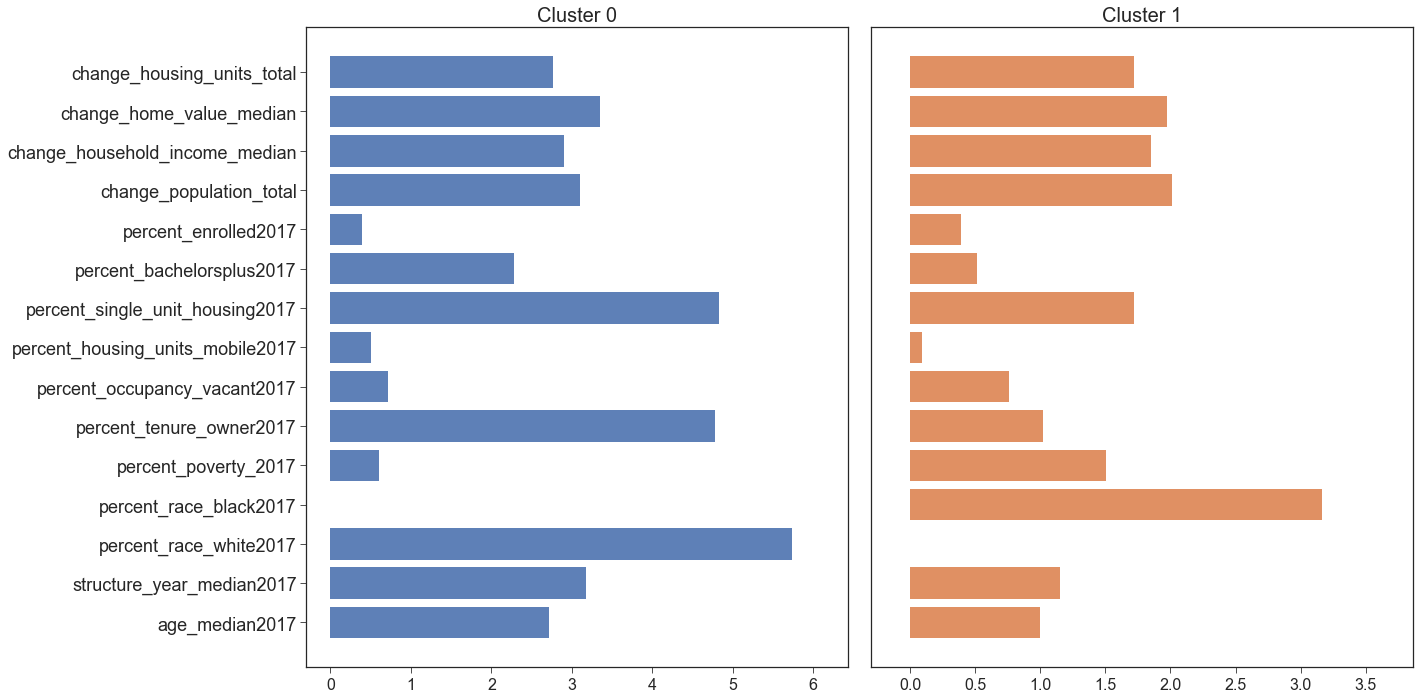

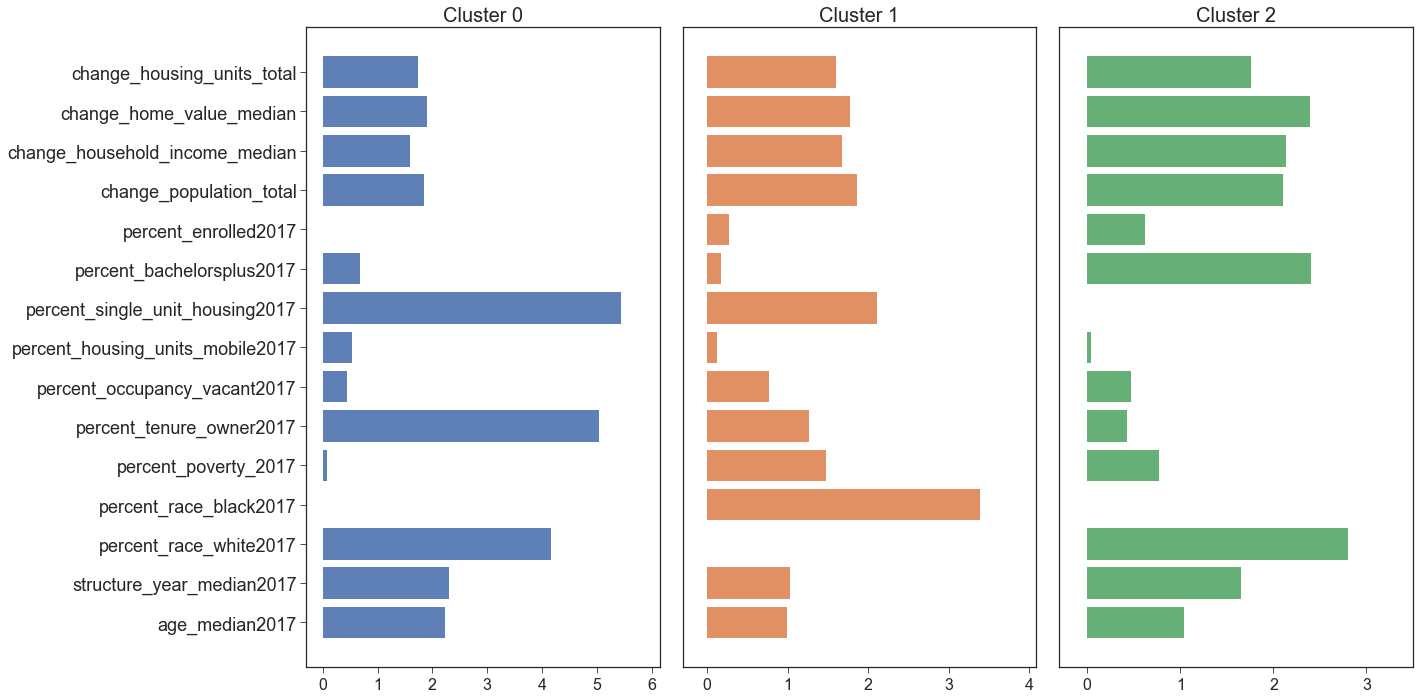

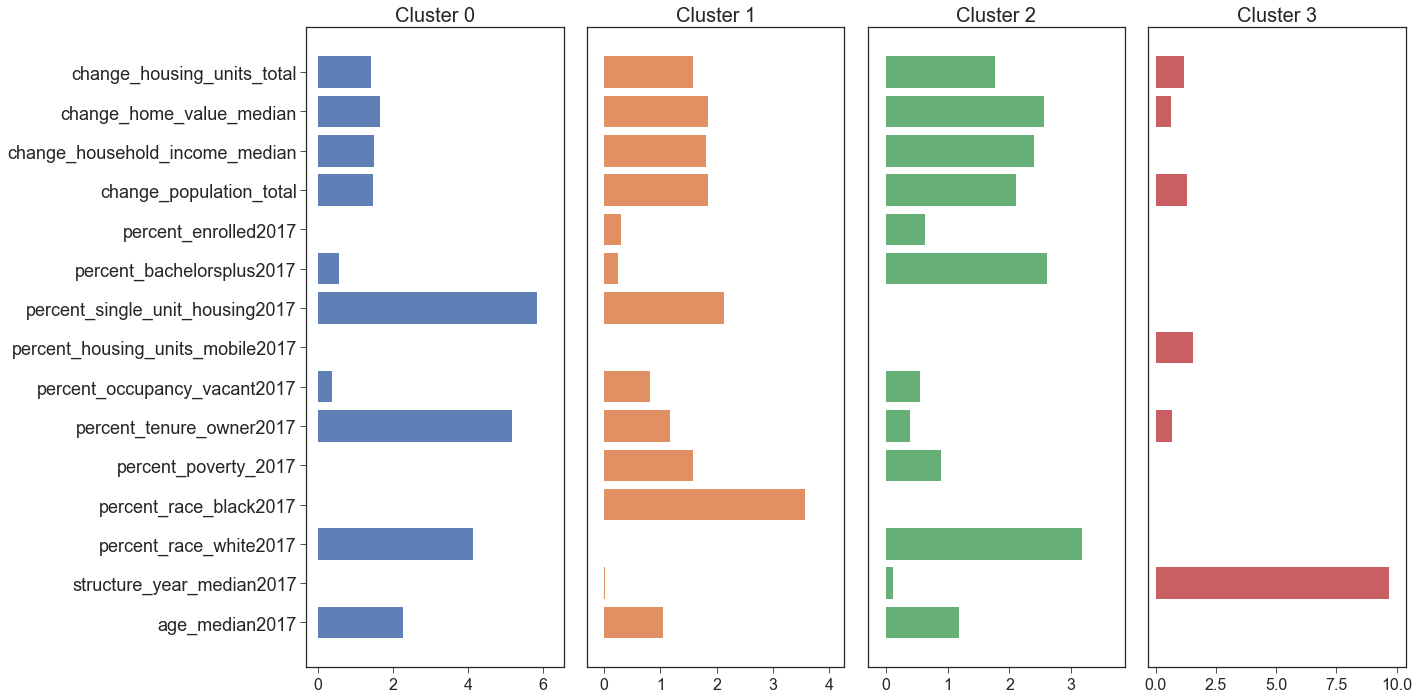

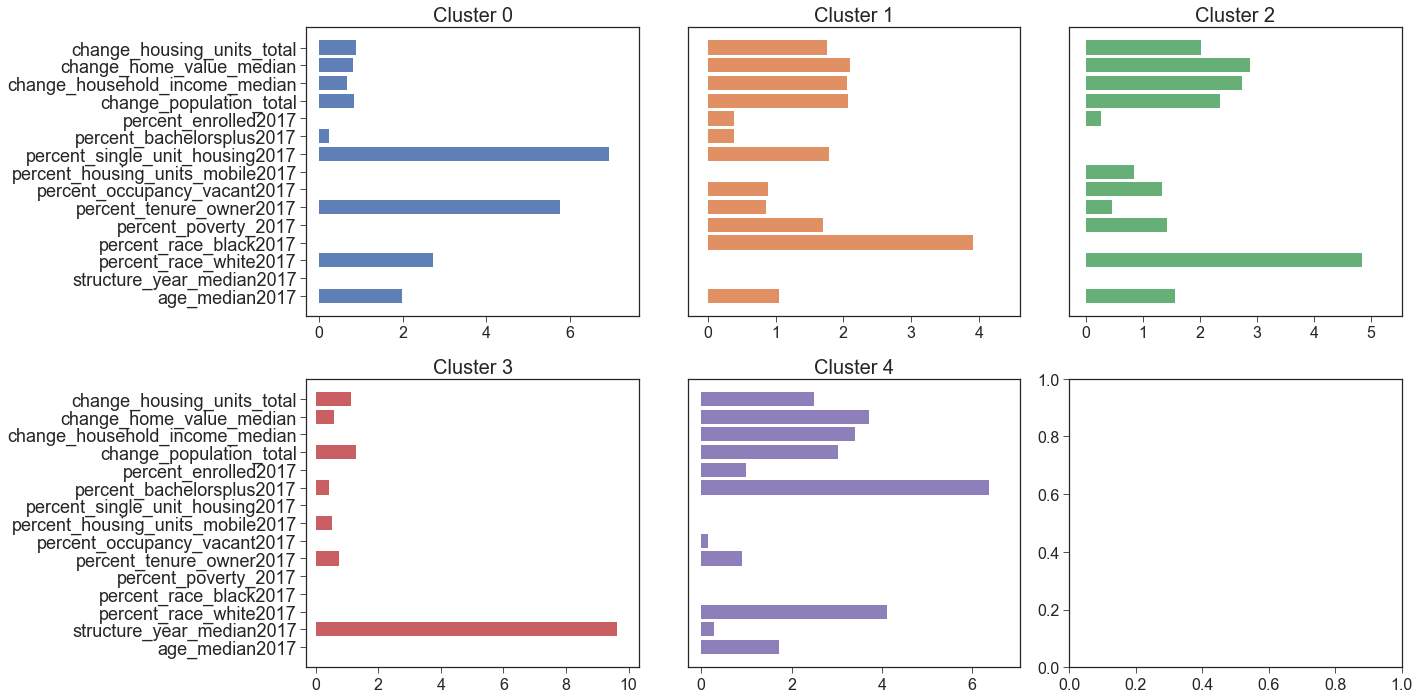

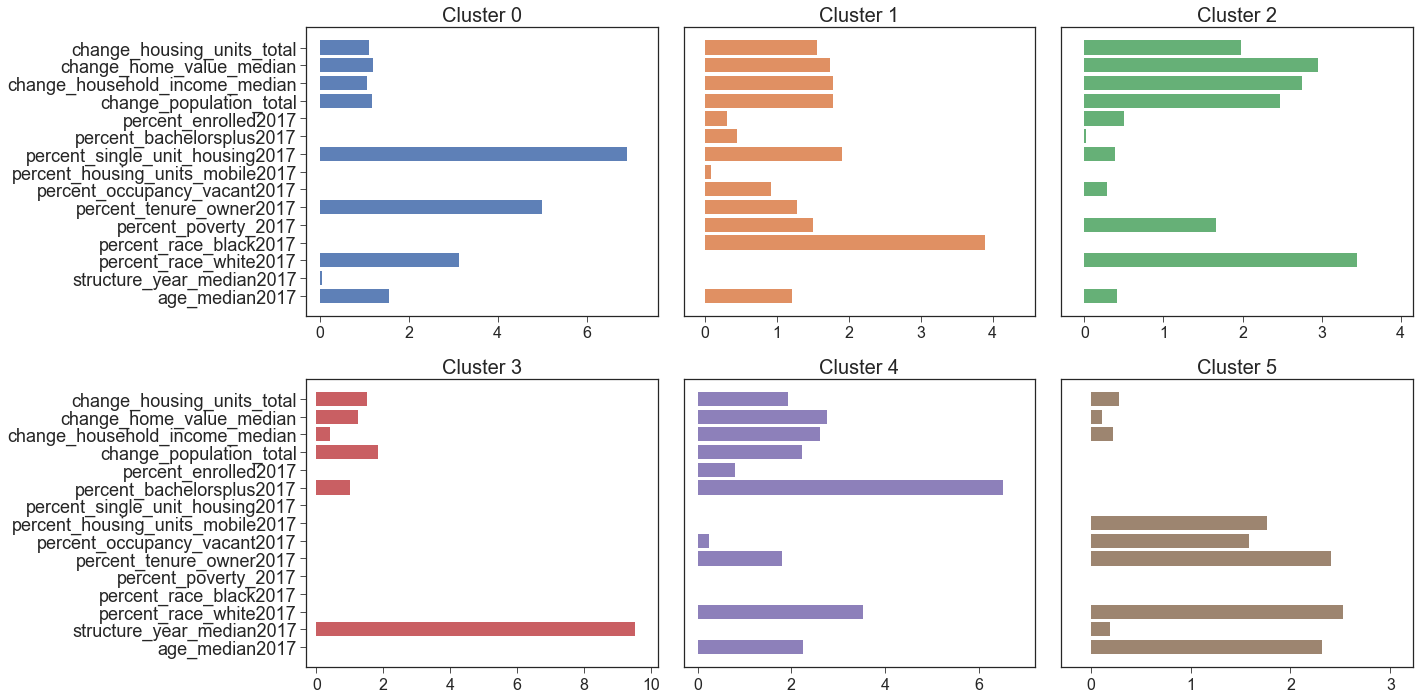

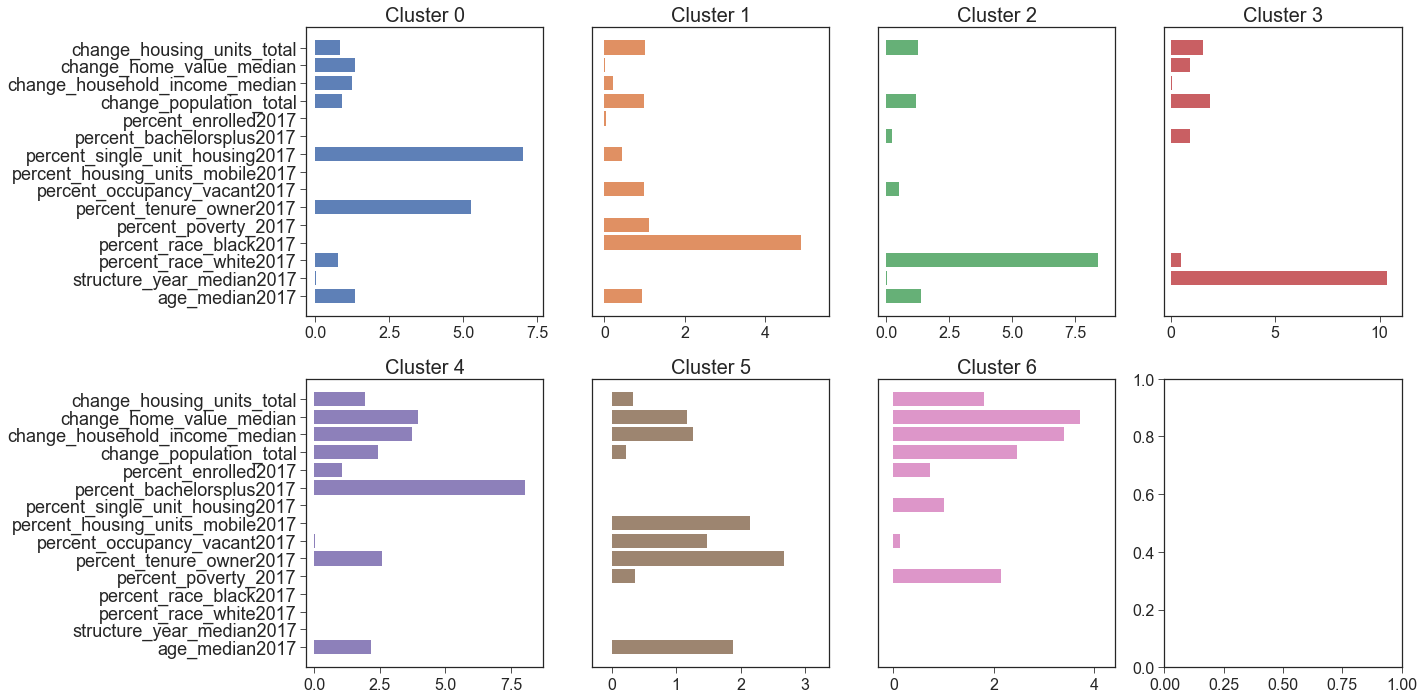

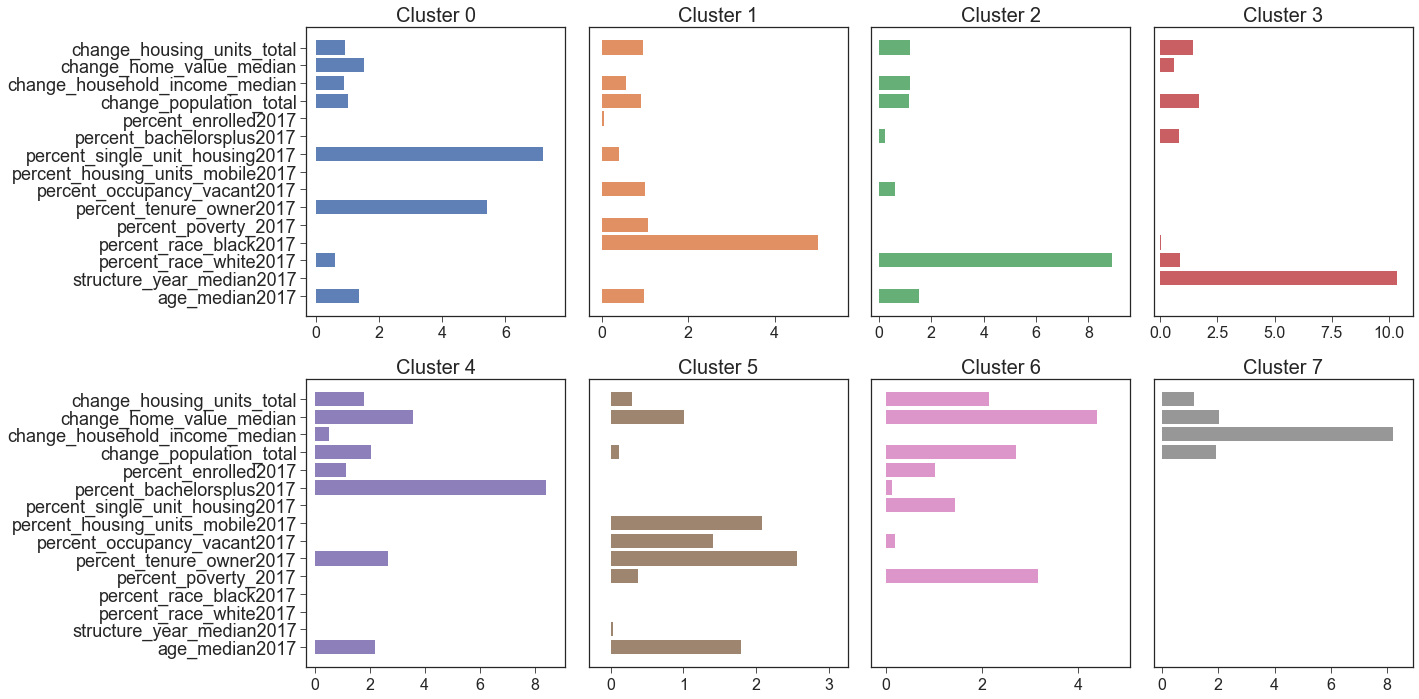

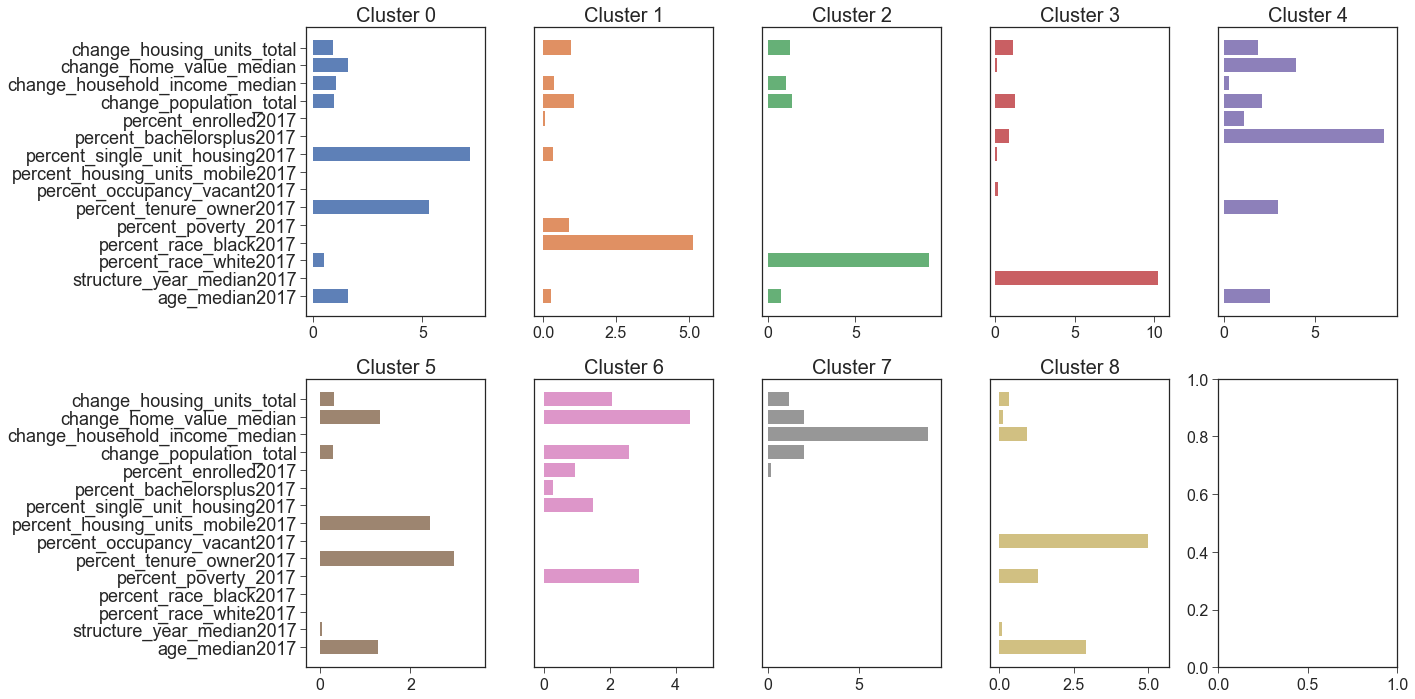

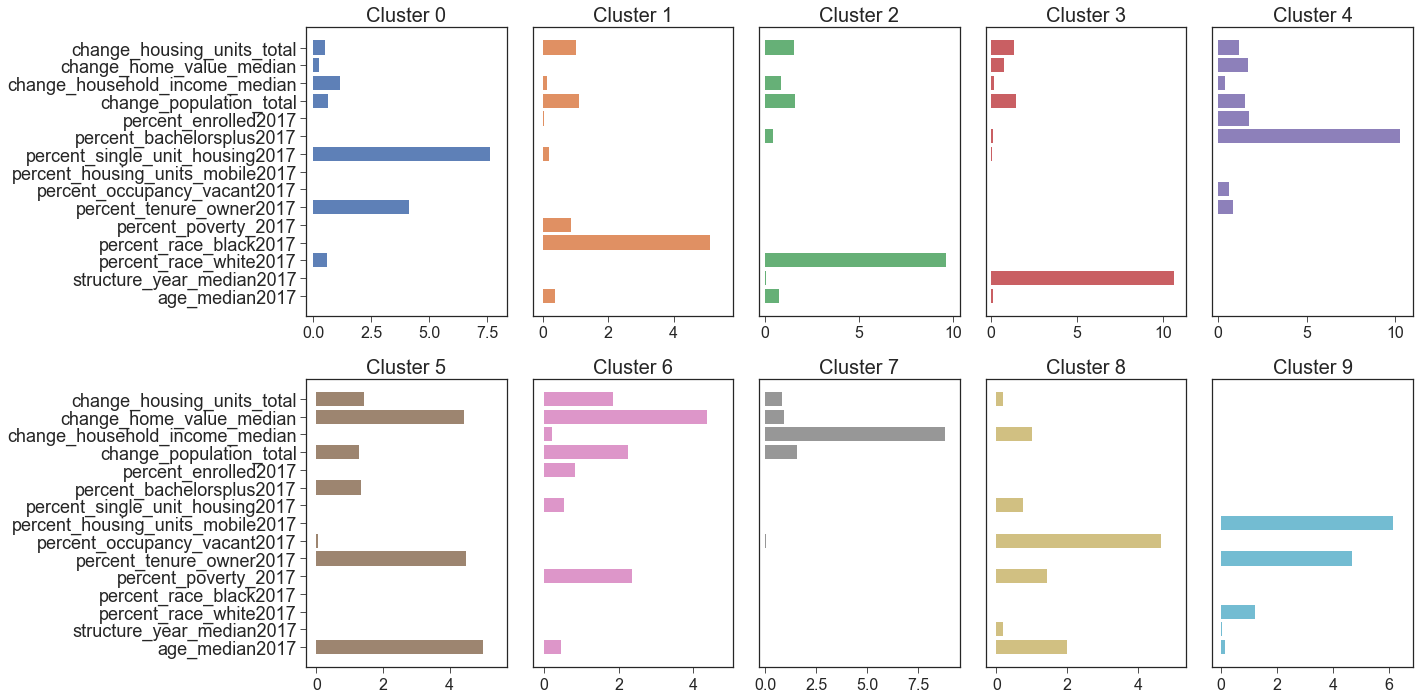

In [9]:
X = ozs.drop(columns=drop_cols)
mm_scaler = prepro.MinMaxScaler()
std_X = mm_scaler.fit_transform(X.values)

for n in range(2, 11):
    paxNMF = NMF(n_components=n)
    w = paxNMF.fit_transform(std_X)
    h = paxNMF.components_
    cluster_plots(paxNMF.components_, X.columns)
    plt.savefig("{}/nmf/NMF{}.png".format(images, n), dpi=120, transparent=True)

In [10]:
mean_eligible = np.mean(e, axis = 0)
mean_oz = np.mean(ozs, axis = 0)

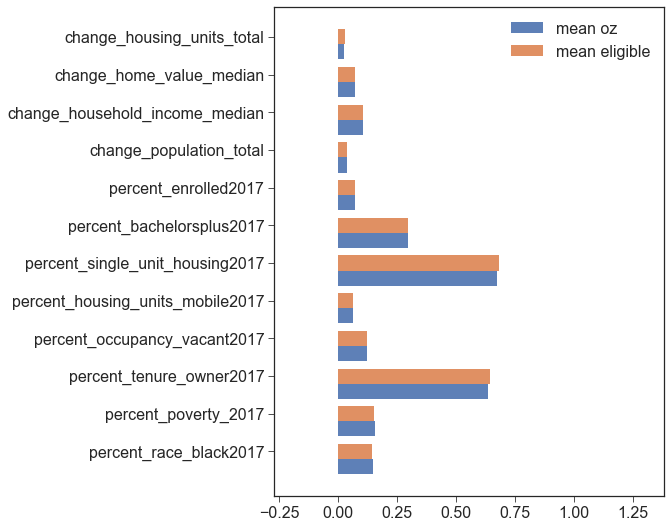

In [11]:
## figure out how to show this
barWidth = 0.4

f, ax = plt.subplots(figsize = (7, 9))

centroid, features = mean_oz[7:-4], mean_oz.index[7:-4]
y = np.arange(len(centroid))
kwargs={'color':palette.as_hex()[0], 'alpha':0.9, 'label':"mean oz", 'height':barWidth}
bars = ax.barh(y, centroid, tick_label=features, **kwargs)

centroid, features = mean_eligible[7:-4], mean_eligible.index[7:-4]
y = np.arange(len(centroid))
kwargs={'color':palette.as_hex()[1], 'alpha':0.9, 'label':"mean eligible", 'align':'center', 'height':barWidth}
bars = ax.barh(y + barWidth, centroid, tick_label=features, **kwargs)
ax.set_xlim(np.min(centroid) - 0.3, np.max(centroid) + 0.7)

ax.legend()

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-ticks')
palette = sns.color_palette(palette='deep')
%matplotlib inline
from paxplot import centroid_plot, cluster_plots

sns.set_style(style={'axes.spines.left': True,
 'axes.spines.bottom': True})
sns.set_context(rc = {'patch.linewidth': 0.0})

In [13]:
corrf = clean.drop(columns=drop_cols).corr()

In [14]:
mask = np.zeros_like(corrf)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

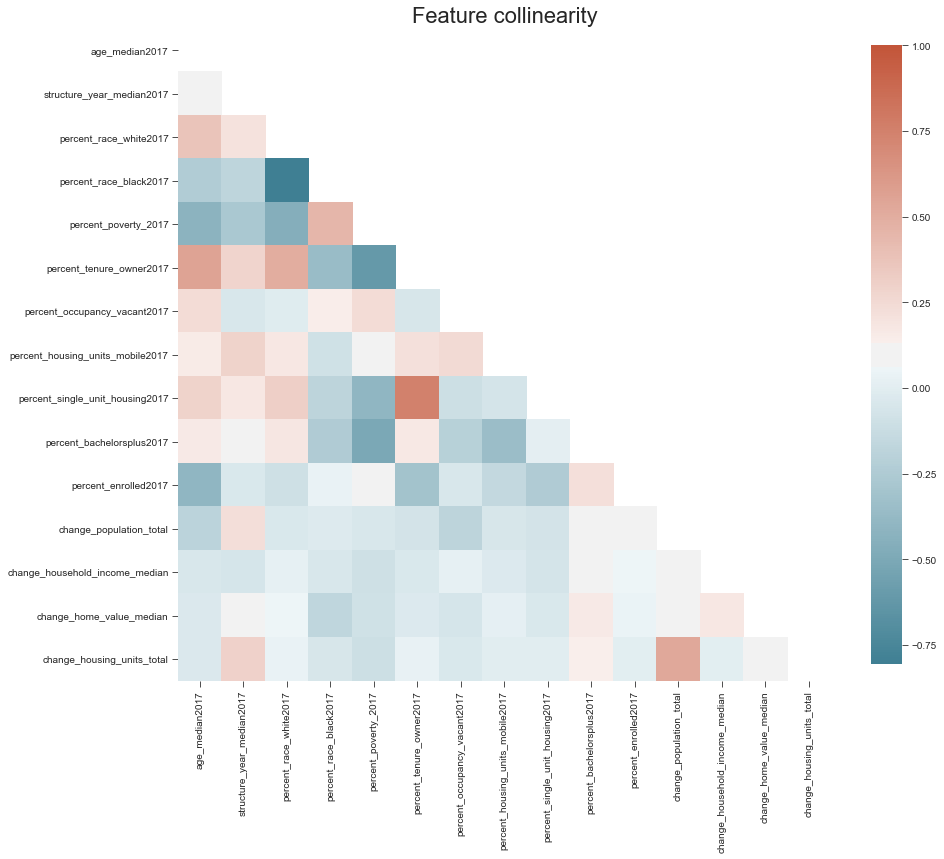

In [16]:
f, ax = plt.subplots(figsize=(14, 14))
colormap = sns.diverging_palette(220, 20, as_cmap=True)
ax.set_title("Feature collinearity", fontsize=22)
sns.heatmap(corrf, square=True, cmap=colormap, cbar_kws={"shrink":0.7}, mask=mask, ax=ax)
ax.set_ylim(len(corrf), 0)
f.tight_layout()